## Transfer Learning VGG 16 using Keras

In [ ]:
!nvidia-smi

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ROOT_PATH = '/content/drive/MyDrive'

In [ ]:
!pwd

/content/drive/My Drive


In [ ]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
!ls

 AccVal_acc.png     data_1.zip	       model_2_vgg16.h5		  Screenshot_20231130_210659.jpg
'Colab Notebooks'   data.zip	       model_3_vgg16.h5
 data		    LossVal_loss.png   model_potato_resnet50.h5
 data_1		    model_1_vgg16.h5   model_vgg16.h5


In [ ]:
!unzip data_1.zip

Archive:  data_1.zip
replace data_1/train/Potato___Early_blight/beb20b26-07f9-4215-8264-dca1283514ac___RS_Early.B 7644.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data_1/train'
valid_path = 'data_1/validation'


In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  print(layer)

In [ ]:

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
for layer in vgg.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
  # useful for getting number of output classes
folders = glob('data_1/train/*')

In [ ]:
folders

['data/train/Potato___Early_blight',
 'data/train/Potato___Late_blight',
 'data/train/Potato___healthy']

In [ ]:
len(folders)

3

In [ ]:
model = Sequential()

model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation='relu' ))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
#model.summary()

In [ ]:
# view the structure of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21138243 (80.64 MB)
Trainable params: 6423555 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# tell the model what cost and optimization method to use
from tensorflow.keras.optimizers import RMSprop
loss = 'categorical_crossentropy'
optimizer =RMSprop(learning_rate=0.0001)

model.compile(
  loss=loss,
  optimizer=optimizer,
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data_1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 456 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('data_1/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 131 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
15/15 [==============================] - 286s 19s/step - loss: 1.3548 - accuracy: 0.5088 - val_loss: 0.5543 - val_accuracy: 0.8321
Epoch 2/20
15/15 [==============================] - 8s 521ms/step - loss: 0.6495 - accuracy: 0.7434 - val_loss: 0.4406 - val_accuracy: 0.8855
Epoch 3/20
15/15 [==============================] - 9s 567ms/step - loss: 0.5313 - accuracy: 0.7873 - val_loss: 0.5427 - val_accuracy: 0.7328
Epoch 4/20
15/15 [==============================] - 9s 616ms/step - loss: 0.4650 - accuracy: 0.8114 - val_loss: 0.5157 - val_accuracy: 0.7634
Epoch 5/20
15/15 [==============================] - 8s 550ms/step - loss: 0.3727 - accuracy: 0.8487 - val_loss: 0.4455 - val_accuracy: 0.8092
Epoch 6/20
15/15 [==============================] - 8s 510ms/step - loss: 0.3526 - accuracy: 0.8596 - val_loss: 0.4365 - val_accuracy: 0.7634
Epoch 7/20
15/15 [==============================] - 8s 534ms/step - loss: 0.3203 - accuracy: 0.8794 - val_loss: 0.6406 - val_accuracy: 0.7557
Epoch 

In [ ]:
import matplotlib.pyplot as plt

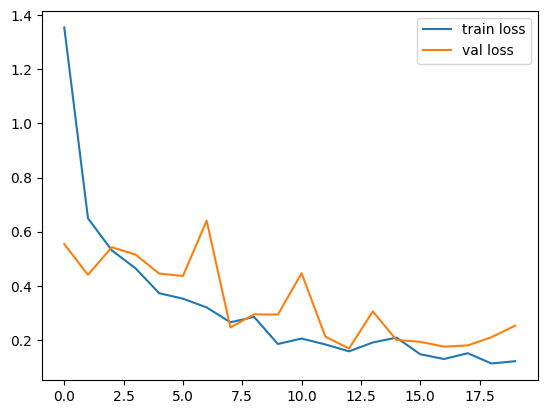

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

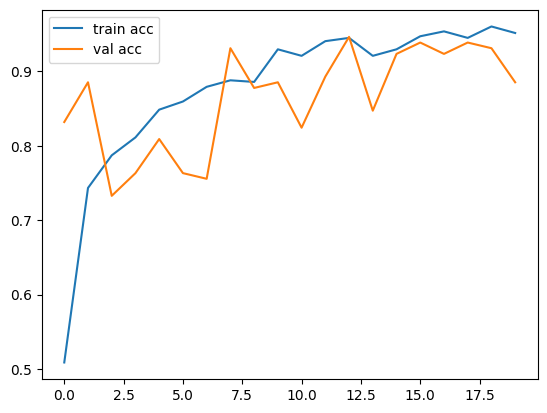

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# # save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Now we save a model, then we load this model while using flask for backend prediction 

In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
y_pred = model.predict(test_set)

5/5 [==============================] - 2s 153ms/step


In [ ]:
y_pred

array([[9.64438379e-01, 3.91996900e-06, 3.55576947e-02],
       [9.78230357e-01, 1.46432023e-04, 2.16231402e-02],
       [3.24648060e-02, 9.36526209e-02, 8.73882592e-01],
       [2.80194223e-01, 2.11213026e-02, 6.98684514e-01],
       [6.04565488e-03, 6.96873426e-01, 2.97080934e-01],
       [8.29362310e-03, 2.15400532e-01, 7.76305854e-01],
       [8.21762741e-01, 2.86457594e-04, 1.77950829e-01],
       [5.30194819e-01, 9.27116314e-04, 4.68878031e-01],
       [9.99979496e-01, 1.71700989e-07, 2.03638992e-05],
       [8.58443081e-02, 2.59383172e-01, 6.54772520e-01],
       [9.99914527e-01, 2.48152028e-05, 6.06806207e-05],
       [4.00856495e-01, 1.32593082e-03, 5.97817540e-01],
       [4.25142385e-02, 5.05556129e-02, 9.06930149e-01],
       [3.76929864e-02, 2.36247122e-01, 7.26059914e-01],
       [6.71380060e-03, 2.48325849e-03, 9.90802884e-01],
       [7.79961169e-01, 7.00652879e-03, 2.13032350e-01],
       [1.92469999e-03, 6.57330215e-01, 3.40745032e-01],
       [9.99718487e-01, 8.77321

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
import pandas as pd
yy=pd.DataFrame(y_pred)
yy.value_counts()

2    70
0    50
1    11
Name: count, dtype: int64

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
# model1=load_model('model_potato_resnet50.h5')
model2=load_model('model_vgg16.h5')

In [ ]:
img=image.load_img('/content/1a1184f8-c414-4ead-a4c4-41ae78e29a82___RS_HL 1971.JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[178., 166., 176.],
        [179., 167., 177.],
        [179., 167., 177.],
        ...,
        [170., 157., 164.],
        [175., 162., 169.],
        [179., 166., 173.]],

       [[170., 158., 168.],
        [170., 158., 168.],
        [171., 159., 169.],
        ...,
        [172., 159., 166.],
        [174., 161., 168.],
        [175., 162., 169.]],

       [[172., 160., 170.],
        [171., 159., 169.],
        [172., 160., 170.],
        ...,
        [173., 160., 167.],
        [172., 159., 166.],
        [172., 159., 166.]],

       ...,

       [[168., 148., 157.],
        [164., 144., 153.],
        [164., 144., 153.],
        ...,
        [133., 112., 119.],
        [159., 138., 145.],
        [161., 140., 147.]],

       [[171., 151., 160.],
        [167., 147., 156.],
        [165., 145., 154.],
        ...,
        [157., 136., 143.],
        [143., 122., 129.],
        [130., 109., 116.]],

       [[173., 153., 162.],
        [168., 148., 157.],
        [166., 1

In [ ]:
import matplotlib.pyplot as plt

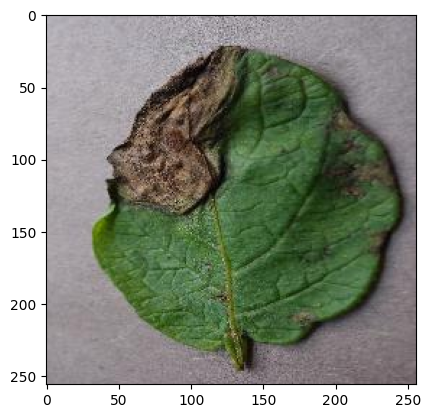

In [ ]:
Z = plt.imread('/content/7b5a2c96-f276-477a-8e7e-3325b02719a7___RS_LB 4613.JPG')
plt.imshow(Z)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
# model1.predict(img_data)

1/1 [==============================] - 0s 24ms/step


array([[1.0000000e+00, 5.6189450e-13, 1.3209963e-13]], dtype=float32)

In [ ]:
model2.predict(img_data)

1/1 [==============================] - 0s 19ms/step


array([[2.1466498e-07, 9.9999976e-01, 1.5511102e-10]], dtype=float32)

In [ ]:
# result1 = np.argmax(model1.predict(img_data), axis=1)
result2 = np.argmax(model2.predict(img_data), axis=1)

1/1 [==============================] - 0s 18ms/step


In [ ]:
result2

array([1])